In [1]:
from IPython.display import display, HTML

# Set the width to a specific percentage of the screen width, e.g., 100%
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from os import path

PROJECT_ROOT = path.abspath(path.join(globals()['_dh'][0], '..'))
DATALAKE_PATH = path.abspath(path.join(PROJECT_ROOT, '..', '..', 'datalake', 'xplainproj'))
FQFN_PROCESSED_DF = path.join(DATALAKE_PATH, 'processed', f'processed_20250207.jsonl')

In [3]:
from xplainproj.trainer import xplain_folder_loader

wtl = xplain_folder_loader.XplainFolderLoader()
wtl.read(DATALAKE_PATH, labels=['0', '1'])

2025-02-08 12:56:46,527 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-08 12:56:46,536 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True


Creating tasks:   0%|          | 0/2 [00:00<?, ?it/s]

Test files processing:   0%|          | 0/704 [00:00<?, ?it/s]

2025-02-08 12:56:48,802 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-08 12:56:48,817 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-08 12:56:48,870 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-08 12:56:48,871 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-08 12:56:48,883 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-08 12:56:48,884 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-08 12:56:48,894 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-08 12:56:48,909 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-08 12:56:48,919 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-08 12:56:48,933

In [4]:
df = wtl.df
df_filtered = df.loc[:, df.columns != 'fqfn']
df_filtered

,file_name,text_body,label,longest_code_line_length,median_code_line_length,lines_of_code,code_size_in_bytes,ratio_of_comments_to_code,is_64base_content_present,file_name_embedding
0,1289.ps1,\nfunction Get-CMsmqMessageQueue\n{\n \n ...,0,1.0,1.0,9.312883,9.312883,-0.11,False,"[-0.68170124, -0.5240398, 0.14555997, 0.277613..."
1,1061.ps1,\n\n\n\n\n\n\n\n\n\n\n\nSet-StrictMode -Versio...,0,1.0,1.0,11.388017,11.388017,-0.09,False,"[-0.68159485, -0.48227602, 0.20190568, 0.29202..."
2,1262.ps1,\nfunction Test-CDscTargetResource\n{\n \n ...,0,1.0,1.0,10.856426,10.856426,-0.10,False,"[-0.68062484, -0.5328485, 0.15031643, 0.272234..."
3,1049.ps1,\n\n\n\n\n\n\n\n\n\n\n\n& (Join-Path -Path $PS...,0,1.0,1.0,10.653741,10.653741,-0.10,False,"[-0.6629062, -0.4953126, 0.22535203, 0.2530482..."
4,1263.ps1,\nfunction Test-CFirewallStatefulFtp\n{\n \...,0,1.0,1.0,8.636625,8.636625,-0.12,False,"[-0.6847729, -0.52624404, 0.13542272, 0.289565..."
...,...,...,...,...,...,...,...,...,...,...
699,894.ps1,"\n$BHgK = '[DllImport(""kernel32.dll"")]public s...",1,1.0,1.0,11.314583,11.314583,-0.09,False,"[-0.7092016, -0.48694262, 0.3059109, 0.4413421..."
700,2809.ps1,\n((new-object net.webclient).DownloadFile('ht...,1,1.0,1.0,7.179909,7.179909,-0.14,False,"[-0.7066325, -0.49039826, 0.24720317, 0.229103..."
701,102.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",1,1.0,1.0,11.126059,11.126059,-0.09,False,"[-0.68433297, -0.49844956, 0.34662682, 0.34134..."
702,2821.ps1,"\n$1 = '$c = ''[DllImport(""kernel32.dll"")]publ...",1,1.0,1.0,11.279030,11.279030,-0.09,False,"[-0.7025869, -0.49556226, 0.25579977, 0.213931..."


<Axes: >

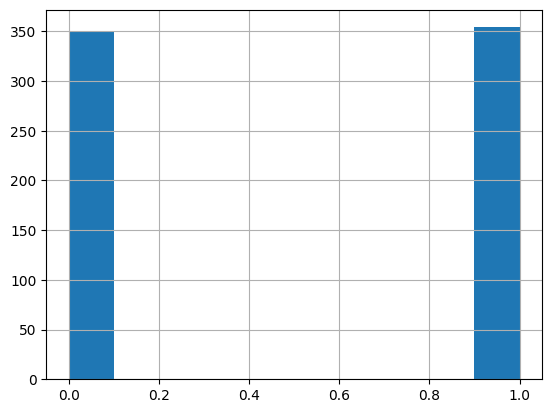

In [5]:
df['label'].hist()

In [6]:
for label in df['label'].unique():
    sampled_df = df[df['label'] == label]['file_name_embedding'].sample(n=10)
    print(f'Sampled DataFrame for label {label}:')
    display(sampled_df)

Sampled DataFrame for label 0:


112    [-0.6448472, -0.5418714, 0.2353214, 0.26844865...
166    [-0.6702795, -0.50405985, 0.17132682, 0.264245...
141    [-0.66448843, -0.5018722, 0.18129341, 0.310334...
94     [-0.67616785, -0.45102385, 0.3707155, 0.277383...
285    [-0.6196193, -0.56098115, 0.2365901, 0.15419, ...
190    [-0.63850677, -0.53774375, 0.24473329, 0.23865...
162    [-0.61189085, -0.50936425, 0.22962943, 0.12033...
243    [-0.65730363, -0.48580417, 0.2074899, 0.278497...
95     [-0.54708135, -0.51365334, 0.2565986, 0.209010...
122    [-0.6588425, -0.4890083, 0.20582764, 0.2679962...
Name: file_name_embedding, dtype: object

Sampled DataFrame for label 1:


384    [-0.70630074, -0.5597498, 0.16273329, 0.222851...
402    [-0.7212416, -0.4711705, 0.32801896, 0.3409890...
608    [-0.6794944, -0.5104539, 0.21766038, 0.2759730...
568    [-0.631977, -0.51373994, 0.2293594, 0.26230276...
366    [-0.68170124, -0.5240398, 0.14555997, 0.277613...
536    [-0.66723865, -0.5226401, 0.16759437, 0.271389...
614    [-0.7409419, -0.4822608, 0.3088669, 0.4314015,...
606    [-0.6965097, -0.50748247, 0.19465749, 0.220671...
458    [-0.7203547, -0.4971552, 0.17465828, 0.2785666...
375    [-0.6629062, -0.4953126, 0.22535203, 0.2530482...
Name: file_name_embedding, dtype: object

In [7]:
df.to_json(FQFN_PROCESSED_DF, orient='records', lines=True)